# Getting started
In this Tutorial 1 we will choose proxy records and load their LiPD files as class objects.

## 0. Preparations
Make sure you have all the dependencies for cupsm installed. You will need numpy, xarray, pandas, geopy, lipd, dask and numba. A prepared conda environment file is available [here](https://github.com/paleovar/cupsm/tree/main/tutorials/condaenv_python-3.11.7.yml). See the [README](https://github.com/paleovar/cupsm/blob/main/README.md) for instructions on setting up the environment.

Next, let's import the necessary packages. Note that you must add the path to the `cupsm` code core in order for `import cupsm` to run successfully.

In [1]:
# import packages
import pandas as pd
import numpy as np
import xarray as xr

# import cupsm
# since cupsm is only available on GitHub, 
# you need to expand your python path variable 
# to the code directory for this notbook session
import sys
sys.path.append('../') # here, it will be the parent direcory
import cupsm


# import plotting packages
import matplotlib
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs

In the tutorial series, we are working with real data from paleoclimate science. In the [data](https://github.com/paleovar/cupsm/tree/main/data) directory you will find wget scripts to download the datasets used here. The wget scripts have been tested and used on Linux only. You can also use your own proxy data (LiPD files) or simulation data (files in netcdf format).

In this first tutorial, we will use the [*PALMOD 130k marine palaeoclimate data synthesis V1_0_1*](https://doi.org/10.1594/PANGAEA.914466) data set. More information about the dataset can be found in the associated [publication](https://doi.org/10.5194/essd-12-1053-2020). You can either download it manually [here](https://store.pangaea.de/Publications/Jonkers-etal_2019/V1_0_1/LiPD.zip) as a .zip file, or use the [wget script](https://github.com/paleovar/cupsm/blob/main/data/wget_sst_reconstruction_databaset_20241212.sh) to download it to your coputer.

In [2]:
lipd_path = # path to directory where LiPD files are

## 1. Proxy overview table

`cupsm` includes a helper infrastructure to easily handle LiPD files.

First an overview table is created as `pandas` DataFrame. This is done by reading all LiPD files in the user-defined file path `lipd_path` and extracting the meta information of the records. The table is saved as a pickle file at a user-defined path `table_path`. In the next session, `cupsm` reuses the previously created table. If you have added new records to your `lipd_path`, be sure to recreate the overview table using the keyword argument `update=True` in the call to the `create_proxy_info` function.

In [3]:
table_path = # path where the overview table should be stored

In [4]:
proxy_overview_table = cupsm.create_proxy_info(database_path=lipd_path, save_path=table_path) # create table
proxy_overview_table.head() # show head of the table

The .proxy_meta_data.pkl file is already present in /data/projects/nfdi4earth/ and is returned.
For updating the file, run with the update=True


,path,file,archive,lon,lat,elevation,age_min,age_max,agemodel,depth_merged,...,planktonic.d18O-6,planktonic.d13C-6,TOC.error,C37.concentration-1,surface.temp-5,surface.temp-6,IRD-1,planktonic.MgCa-3,UK37-1,depth_uncorrected
MD88_770,/data/obs/proxy_databases/PalMod130k/PALMOD130...,MD88_770.lpd,marine sediment,96.4614,-46.0214,-3290.0,6.34841,18.567262,True,True,...,False,False,False,False,False,False,False,False,False,False
GIK18471_1,/data/obs/proxy_databases/PalMod130k/PALMOD130...,GIK18471_1.lpd,marine sediment,129.9830,-9.3665,-485.0,4.272588,130.610203,True,True,...,False,False,False,False,False,False,False,False,False,False
182_1132B,/data/obs/proxy_databases/PalMod130k/PALMOD130...,182_1132B.lpd,marine sediment,127.6022,-33.3162,-218.5,29.954729,132.101998,True,True,...,False,False,False,False,False,False,False,False,False,False
MD95_2039,/data/obs/proxy_databases/PalMod130k/PALMOD130...,MD95_2039.lpd,marine sediment,-10.3485,40.5785,-3381.0,6.62868,126.912131,True,True,...,False,False,False,False,False,False,False,False,False,False
KNR166_2_105,/data/obs/proxy_databases/PalMod130k/PALMOD130...,KNR166_2_105.lpd,marine sediment,-79.2294,24.5639,-304.0,0.272656,4.677325,True,True,...,False,False,False,False,False,False,False,False,False,False


## 2. Record choice
`cupsm` provides a helper function `get_records_df` which returns a list of class objects, one for each record. These proxy record objects **obs_data** contain the proxy data as `xarray` `DataSet` and the metadata of the specific record. Records can be chosen by function parameters and keyword arguments. We will go through two examples and explore the obs_data object on the fly:
1) Chosen by location

   i) Explore obs_data object
3) Chosen by file name
 
Type `?cupsm.get_records_df` for more information on available arguments.

### 1) Chosen by location
Let's assume we want to use all proxy records which are in the tropical latitudes (30°S-30°N). This can be done with the `location` and `loc_radius` keyword arguments.

In [5]:
obs_data_tropics = cupsm.get_records_df(proxy_overview_table, location=[True, 0], loc_radius=[0,30])

I return a list with 54 record objects at [True, 0] +/- [0, 30].


#### Explore obs_data object
Let's explore the first item of the list `obs_data_tropics[0]`:

In [6]:
example_object = obs_data_tropics[0] # take first object

print("Available attributes and methods are:")
[att for att in dir(example_object) if "__" not in att]

Available attributes and methods are:


['age',
 'archive_type',
 'av_ds',
 'coords',
 'create_target',
 'fname',
 'info',
 'lipd',
 'load',
 'load_chron_data',
 'load_paleo_data',
 'path',
 'site_name',
 'target']

Short explanation of the available attributes and methods:

**Attributes:**
- `age`: the age axis of the proxa data
- `archive_type`: archive type, e.g. marine sediment
- `av_ds`: available data sets
- `coords`: proxy location in lon, lat, depth
- `fname`: name of the LiPD file
- `lipd`: the lipd file as it is read in with the python lipd package
- `path`: the path where LiPD files are located
- `site_name`: name of the record site
- `target`: target object for proxy forward modeling (see Tutorial 2) 

**Methods:**
- `create_target`: creates a target subclass for proxy forward modeling (see Tutorial 2)
- `info`: prints a basic overview of the record
- `load`: loads all paleo/proxy data and age model data and combines them in one `xarray` `DataSet`
- `load_chron_data`: loads the age model data
- `laod_paleo_data`: loads the proxy data, data can be chosen by `data_set` parameter. You can put `"all"` to load all available data. You can chose whether you want to work on the `age` or `depth` coordinate with the `coord` keyword argument.

In [7]:
# Test the info function
example_object.info()


marine sediment record GIK18471_1 (4.27 - 130.61 ka)
Position: lon=129.983°E, lat=-9.3665°N, elevation=-485m
available datasets:
['depth_merged', 'age', 'age-1', 'benthic.MgCa', 'benthic.d18O', 'benthic.d18O-1', 'deep.temp', 'planktonic.MgCa', 'planktonic.d18O', 'surface.temp']
            


In [8]:
# load Variable "deep.temp"
example_data = example_object.load_paleo_data(data_set='deep.temp', coord="age")
example_data

Variables were renamed to make them accessible via as xarray.dataset attributes, e.g. 'planktonic.d18O-1' --> 'planktonic_d18O_1' 


<xarray.Dataset>
Dimensions:    (age: 162)
Coordinates:
  * age        (age) float64 4.273 7.438 10.88 13.09 ... 128.1 129.4 130.6 nan
Data variables:
    deep_temp  (age) float64 9.18 nan 9.96 nan nan ... 10.5 11.83 9.6 11.45 8.63
Attributes:
    description:  Measured paleo data from GIK18471_1.
    note:         Variables were renamed, e.g. 'planktonic.d18O-1' --> 'plank...

**NOTE:** Variables were renamed to make them accessible via as xarray.dataset attributes, e.g. 'planktonic.d18O-1' --> 'planktonic_d18O_1'. The warning can be suppressed by using the keyword argument `quiet=True`.
The attributes are also integrated into the `xarray` `DataSet` but left unchanged from the origin LiPD file.

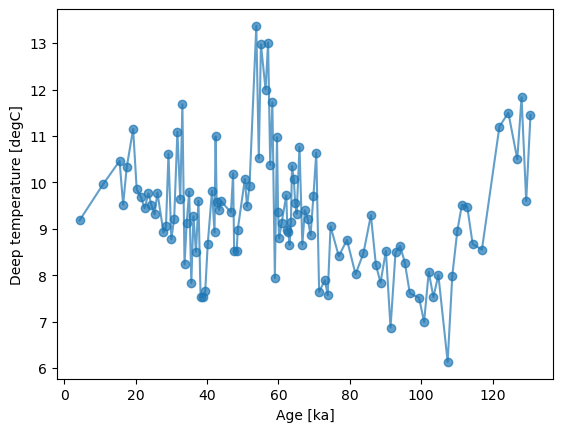

In [9]:
# Small plot
# get rid of np.nans for plotting:
nan_mask = np.invert(( np.isnan(example_data.age)) | ( np.isnan(example_data.deep_temp)))

# plot data
plt.plot(np.round(example_data.age[nan_mask],1), example_data.deep_temp[nan_mask], marker="o", alpha=0.7)
# labels
plt.xlabel("Age [ka]")
plt.ylabel(f"Deep temperature [{example_data.deep_temp.units}]")
plt.show()

Next, we create a small map plot of the chosen records. For that, we first extract their positions:

In [10]:
# initialize empty lists
lon_list = []
lat_list = []

# iterate through object list
for site in obs_data_tropics:
    lon, lat, el = site.coords
    lon_list.append(lon)
    lat_list.append(lat)

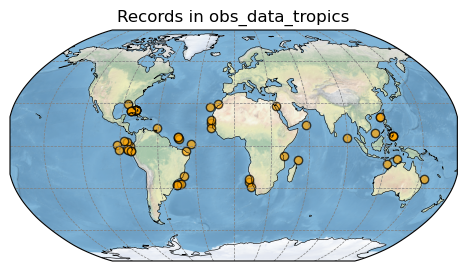

In [11]:
# create a small plot
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8,3), subplot_kw={"projection" : ccrs.Robinson()})

im = ax.scatter(lon_list, lat_list, transform=ccrs.PlateCarree(), color="orange", edgecolor="black", alpha=0.7)

extent = [-180, 180, -90, 90]
ax.set_extent(extent, ccrs.PlateCarree())

ax.stock_img()
ax.coastlines(linewidth=0.4)
gl = ax.gridlines(draw_labels=False, linewidth=0.5, color='gray', linestyle='--')
gl.xlocator = plt.FixedLocator(np.arange(-180,210,30))
gl.ylocator = plt.FixedLocator(np.arange(-90,90,30))

plt.title("Records in obs_data_tropics")

plt.show()

### 2) Chosen by file name
In this case, we already know the sites that we want to analyze.

In [12]:
# list of our sites
sites = ["SU81_18.lpd", "TR163_22.lpd", "SO201_2_12KL.lpd", "MD98_2181.lpd", "GeoB1711_4.lpd"]

In [13]:
# initialize the obs_data object as list:
obs_data = cupsm.get_records_df(df=proxy_overview_table, file_name=sites)

print(f"The object is of type {type(obs_data)}.")

# example printout:
obs_data[1].info()

I return a list with 5 record objects at None +/- None.
The object is of type <class 'list'>.

marine sediment record TR163_22 (0.94 - 128.52 ka)
Position: lon=-92.3988°E, lat=0.5157°N, elevation=-2830m
available datasets:
['depth_merged', 'age', 'age-1', 'planktonic.d18O', 'benthic.d18O', 'planktonic.MgCa', 'surface.temp']
            


Alternatively, you can initialize the obs_data object as a dictionary, where the site name points to the proxy class object. We recommend this method because the sites are directly identifiable.

In [14]:
# One can also initialize the obs_data object as dictionary, where the site name points to the proxy class object:
obs_data = cupsm.get_records_df(df=proxy_overview_table, file_name=sites, return_as="dictionary")

print(f"The object is of type {type(obs_data)}.")

# example printout:
obs_data["TR163_22"].info()

I return a dictionary with 5 record objects at None +/- None.
The object is of type <class 'dict'>.

marine sediment record TR163_22 (0.94 - 128.52 ka)
Position: lon=-92.3988°E, lat=0.5157°N, elevation=-2830m
available datasets:
['depth_merged', 'age', 'age-1', 'planktonic.d18O', 'benthic.d18O', 'planktonic.MgCa', 'surface.temp']
            
